In [46]:
#loading up everything that is needed.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as stats

In [47]:
#access personal drive for data.
#uncommit next two lines when working in collab

#from google.colab import drive
#drive.mount('/content/drive')

In [48]:
#turn csv into dataframe

#games = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/games.csv')

#local file
games = pd.read_csv('games.csv')

In [49]:
#Checking load

games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


# EDA

In [50]:
games.describe()


,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,8.356000e+04,83560.000000,83560.000000,83560.000000,83560.000000,83560.000000,83560.000000,8.356000e+04,83560.000000,44.000000,83560.000000,8.356000e+04,83560.000000,83560.000000,83560.000000,83560.000000
mean,1.334063e+06,136.255086,0.316563,7.195325,0.551795,3.408270,0.040558,9.760502e+02,162.522367,98.909091,20.083772,7.894248e+02,106.641204,10.854931,95.016599,11.656498
std,6.814413e+05,5450.777515,2.267967,12.312332,13.846870,15.551867,1.807466,2.458273e+04,4616.325460,0.857747,172.998788,1.805742e+04,1152.854945,190.540115,1524.560676,207.227074
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.630450e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.304165e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.886992e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.700000e+01,14.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.719700e+06,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [51]:
# # checking for dupes

games.duplicated().sum()

0

In [52]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83560 entries, 0 to 83559
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       83560 non-null  int64  
 1   Name                        83554 non-null  object 
 2   Release date                83560 non-null  object 
 3   Estimated owners            83560 non-null  object 
 4   Peak CCU                    83560 non-null  int64  
 5   Required age                83560 non-null  int64  
 6   Price                       83560 non-null  float64
 7   DLC count                   83560 non-null  int64  
 8   About the game              80123 non-null  object 
 9   Supported languages         83560 non-null  object 
 10  Full audio languages        83560 non-null  object 
 11  Reviews                     9716 non-null   object 
 12  Header image                83560 non-null  object 
 13  Website                     390

In [53]:
# checking for nulls
games.isnull().sum().sort_values()

AppID                             0
Median playtime two weeks         0
Median playtime forever           0
Average playtime two weeks        0
Average playtime forever          0
Recommendations                   0
Achievements                      0
Negative                          0
Positive                          0
User score                        0
Linux                             0
Mac                               0
Windows                           0
Metacritic score                  0
Required age                      0
Header image                      0
Full audio languages              0
Supported languages               0
DLC count                         0
Price                             0
Release date                      0
Peak CCU                          0
Estimated owners                  0
Name                              6
Screenshots                    1926
Genres                         3425
About the game                 3437
Developers                  

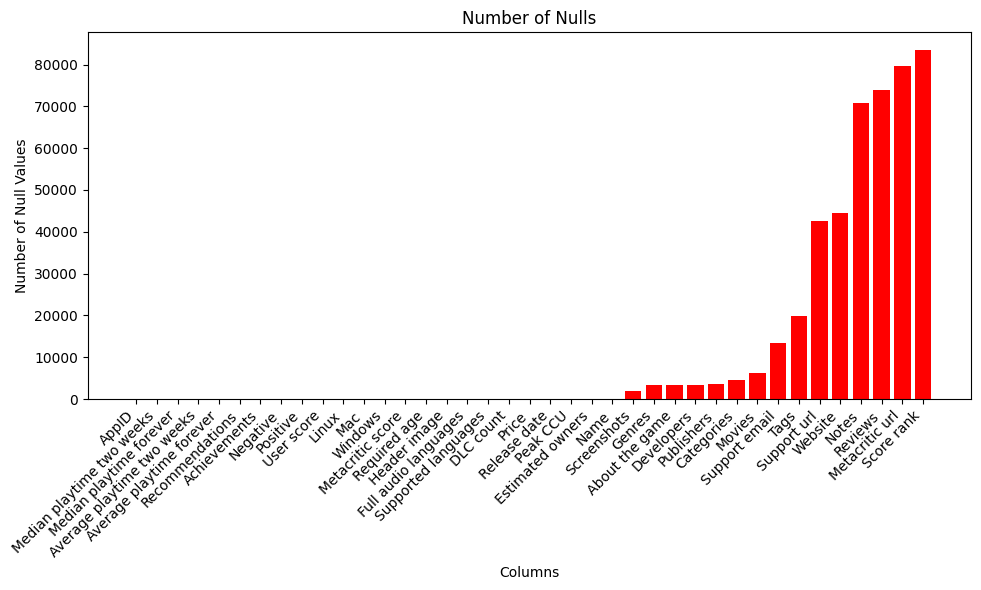

In [54]:
#display nulls as a graph
%matplotlib inline

null_counts = games.isnull().sum().sort_values() # sort values in ascending order


plt.figure(figsize=(10,6))
plt.bar(null_counts.index, null_counts.values, color = 'red')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Number of Nulls')
plt.xticks(rotation = 45, ha= 'right') #angles the columns labels for better readability
plt.tight_layout()
plt.show()

**Columns to keep for sure even though we have some nulls:**

*   Genres
*   Developers
*   Publishers
*   Tags

**Columns to review for dropping:**

*   Screenshots
*   About the Game
*   Movies
*   Support Emails
*   Support url
*   Website
*   Notes
*   Review
*   Metacritic url
*   Scorerank



In [55]:
#let's look at the nulls a little be closer

null_threshold = 6

columns_nulls = games.columns[games.isnull().sum() > null_threshold].tolist()

#need to be careful. It looks like 'Genre', 'Categories' and 'Tags' are needed.

In [56]:
#columns to be reviewed.
columns_nulls

['About the game',
 'Reviews',
 'Website',
 'Support url',
 'Support email',
 'Metacritic url',
 'Score rank',
 'Notes',
 'Developers',
 'Publishers',
 'Categories',
 'Genres',
 'Tags',
 'Screenshots',
 'Movies']

In [57]:
# can drop. Might be interesting to do an analysis on this word bubble in a different analysis
games['About the game'].unique

<bound method Series.unique of 0        Galactic Bowling is an exaggerated and stylize...
1        THE LAW!! Looks to be a showdown atop a train....
2        Jolt Project: The army now has a new robotics ...
3        HENOSIS™ is a mysterious 2D Platform Puzzler w...
4        ABOUT THE GAME Play as a hacker who has arrang...
                               ...                        
83555    ABOUT THE GAME A sex simulation game with visu...
83556    Are you ready to find the difference? Then qui...
83557    UNDRESS! - is an exciting game in which the pl...
83558    Story: The world is shrouded with the eclipse ...
83559    'Hentai Abigail' is a unique puzzle in which t...
Name: About the game, Length: 83560, dtype: object>

In [58]:
# can drop
games['Screenshots'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              5
https://cdn.akamai.steamstatic.com/steam/apps/359550/ss_79af6b4e7ea15b74

In [59]:
# can drop
games['Support email'].value_counts()

info@bigfishgames.com                            325
mikhail.zverev@8floor.net                        271
business@atomicfabrik.com                        199
contact@exosyphenstudios.com                     178
support@bigfishgames.zendesk.com                 164
                                                ... 
crackedegghelp@gmail.com                           1
hey@rocketmonstergames.com                         1
support-breacharchangel-steam@hostedgames.org      1
chris@ooblies.com                                  1
casualrae@gmail.com                                1
Name: Support email, Length: 41334, dtype: int64

In [60]:
# can drop
games['Score rank'].value_counts()


99.0     18
98.0     12
100.0    12
97.0      2
Name: Score rank, dtype: int64

In [61]:
# can drop
games['Notes'].value_counts()

Nakedness. All characters appearing in this game are over 18 years of age.                                                                                      117
This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence or Gore, General Mature Content    113
-Nudity or sexual content -Not suitable for watching at work -Not suitable for all ages -All characters in the game are over 18 years old                        57
This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Nudity or Sexual Content, General Mature Content      43
This game contains the following sexual content ・Strong language ・Sexual language                                                                                39
                                                                                                                                                               ... 
This game does i

## Columns that will be dropped.

* 'About the game'
* 'Reviews'
* 'Website'
* 'Support url'
* 'Support email'
* 'Metacritic url'
* 'Score rank'
* 'Notes'
* 'Screenshots'
* 'Movies'

In [62]:
#columns that would be need to be dropped.
drop_me =  ['About the game', 'Reviews', 'Website', 'Support url', 'Support email', 'Metacritic url', 'Score rank', 'Notes', 'Screenshots', 'Movies']

In [63]:
#dropping unneccessary columns
games = games.drop(columns = drop_me)

In [64]:
#checking dropped Columns
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83560 entries, 0 to 83559
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       83560 non-null  int64  
 1   Name                        83554 non-null  object 
 2   Release date                83560 non-null  object 
 3   Estimated owners            83560 non-null  object 
 4   Peak CCU                    83560 non-null  int64  
 5   Required age                83560 non-null  int64  
 6   Price                       83560 non-null  float64
 7   DLC count                   83560 non-null  int64  
 8   Supported languages         83560 non-null  object 
 9   Full audio languages        83560 non-null  object 
 10  Header image                83560 non-null  object 
 11  Windows                     83560 non-null  bool   
 12  Mac                         83560 non-null  bool   
 13  Linux                       835

In [65]:
# can drop
games['Header image'].value_counts()

https://cdn.akamai.steamstatic.com/steam/apps/750920/header.jpg?t=1644931091     20
https://cdn.akamai.steamstatic.com/steam/apps/359550/header.jpg?t=1655223333      5
https://cdn.akamai.steamstatic.com/steam/apps/24010/header.jpg?t=1658409119       5
https://cdn.akamai.steamstatic.com/steam/apps/2195250/header.jpg?t=1701266064     4
https://cdn.akamai.steamstatic.com/steam/apps/37960/header.jpg?t=1447352428       4
                                                                                 ..
https://cdn.akamai.steamstatic.com/steam/apps/326730/header.jpg?t=1657789925      1
https://cdn.akamai.steamstatic.com/steam/apps/555040/header.jpg?t=1479077669      1
https://cdn.akamai.steamstatic.com/steam/apps/1007810/header.jpg?t=1656914140     1
https://cdn.akamai.steamstatic.com/steam/apps/363330/header.jpg?t=1580998485      1
https://cdn.akamai.steamstatic.com/steam/apps/2530730/header.jpg?t=1691744164     1
Name: Header image, Length: 83451, dtype: int64

In [66]:
# can drop
games['Full audio languages'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [67]:
# can drop
games['DLC count'].value_counts()

0      71798
1       7540
2       1871
3        713
4        392
       ...  
579        1
87         1
190        1
149        1
90         1
Name: DLC count, Length: 95, dtype: int64

In [68]:
#can drop? keep
games['Achievements'].value_counts()

0       42351
10       2084
12       1634
20       1473
6        1383
        ...  
211         1
394         1
1552        1
4981        1
238         1
Name: Achievements, Length: 431, dtype: int64

In [69]:
#can drop
games['Recommendations'].value_counts()

0         69837
116          69
106          65
101          60
105          60
          ...  
130347        1
4436          1
5822          1
1232          1
6040          1
Name: Recommendations, Length: 4034, dtype: int64

In [70]:
#dropping additional columns
#12-6-2023 droppign the playtime. These metric are recorded after the fact a game is bought already.

drop_me_too =['Header image','Full audio languages','Supported languages','Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks' ]

In [71]:
#dropping unneccessary columns part two
games = games.drop(columns = drop_me_too)

In [72]:
games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,User score,Positive,Negative,Achievements,Recommendations,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,True,False,...,0,6,11,30,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,True,True,...,0,53,5,12,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,True,False,...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,True,True,...,0,3,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,True,True,...,0,50,8,17,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [73]:
games.shape

(83560, 22)

In [74]:
#getting rid of nulls
games.dropna(inplace = True)

In [75]:
games.shape

(62321, 22)

In [76]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62321 entries, 0 to 83556
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppID             62321 non-null  int64  
 1   Name              62321 non-null  object 
 2   Release date      62321 non-null  object 
 3   Estimated owners  62321 non-null  object 
 4   Peak CCU          62321 non-null  int64  
 5   Required age      62321 non-null  int64  
 6   Price             62321 non-null  float64
 7   DLC count         62321 non-null  int64  
 8   Windows           62321 non-null  bool   
 9   Mac               62321 non-null  bool   
 10  Linux             62321 non-null  bool   
 11  Metacritic score  62321 non-null  int64  
 12  User score        62321 non-null  int64  
 13  Positive          62321 non-null  int64  
 14  Negative          62321 non-null  int64  
 15  Achievements      62321 non-null  int64  
 16  Recommendations   62321 non-null  int64 

### Cleaning up Estimated owners

In [77]:
games['Estimated owners'].value_counts()

0 - 20000                44310
20000 - 50000             7678
50000 - 100000            3822
100000 - 200000           2519
200000 - 500000           2103
500000 - 1000000           895
1000000 - 2000000          515
2000000 - 5000000          326
5000000 - 10000000          90
10000000 - 20000000         37
20000000 - 50000000         21
50000000 - 100000000         4
100000000 - 200000000        1
Name: Estimated owners, dtype: int64

In [78]:
#dropping games where this is no owner.
games = games[games['Estimated owners'] != '0 - 0']

In [79]:
# 
games['Estimated owners'].value_counts()

0 - 20000                44310
20000 - 50000             7678
50000 - 100000            3822
100000 - 200000           2519
200000 - 500000           2103
500000 - 1000000           895
1000000 - 2000000          515
2000000 - 5000000          326
5000000 - 10000000          90
10000000 - 20000000         37
20000000 - 50000000         21
50000000 - 100000000         4
100000000 - 200000000        1
Name: Estimated owners, dtype: int64

In [80]:
est_map = {'0 - 20000': 10000,'20000 - 50000': 35000,'50000 - 100000': 75000,'100000 - 200000': 150000,'200000 - 500000': 350000,'500000 - 1000000': 750000,'1000000 - 2000000': 1500000,'2000000 - 5000000': 3500000,'5000000 - 10000000': 7500000,'10000000 - 20000000': 15000000,'20000000 - 50000000': 35000000,'50000000 - 100000000': 75000000,'100000000 - 200000000': 150000000}   


In [81]:
#remapping estimated owner to the median value between the upper and lower.games_no_owner

games.replace({'Estimated owners': est_map}, inplace=True)


In [82]:
games["Estimated owners"].value_counts()

10000        44310
35000         7678
75000         3822
150000        2519
350000        2103
750000         895
1500000        515
3500000        326
7500000         90
15000000        37
35000000        21
75000000         4
150000000        1
Name: Estimated owners, dtype: int64

In [83]:
#getting rid of nulls
games.dropna(inplace = True)

In [84]:
games.shape

(62321, 22)

In [85]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62321 entries, 0 to 83556
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppID             62321 non-null  int64  
 1   Name              62321 non-null  object 
 2   Release date      62321 non-null  object 
 3   Estimated owners  62321 non-null  int64  
 4   Peak CCU          62321 non-null  int64  
 5   Required age      62321 non-null  int64  
 6   Price             62321 non-null  float64
 7   DLC count         62321 non-null  int64  
 8   Windows           62321 non-null  bool   
 9   Mac               62321 non-null  bool   
 10  Linux             62321 non-null  bool   
 11  Metacritic score  62321 non-null  int64  
 12  User score        62321 non-null  int64  
 13  Positive          62321 non-null  int64  
 14  Negative          62321 non-null  int64  
 15  Achievements      62321 non-null  int64  
 16  Recommendations   62321 non-null  int64 

## Seeing some preliminary correlation

In [86]:
games.corr()

,AppID,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations
AppID,1.000000,-0.089421,-0.008768,-0.099326,0.005875,-0.026637,0.003852,-0.192399,-0.149921,-0.274209,-0.013463,-0.048353,-0.037993,-0.045755,-0.049942
Estimated owners,-0.089421,1.000000,0.536848,0.100976,0.041660,0.024468,0.000934,0.038197,0.042397,0.178920,-0.002010,0.667340,0.641178,0.017112,0.535241
Peak CCU,-0.008768,0.536848,1.000000,0.037361,0.052128,0.009036,0.000380,0.006375,0.008120,0.057877,-0.000728,0.643449,0.585307,0.006589,0.517409
Required age,-0.099326,0.100976,0.037361,1.000000,0.129223,0.015550,-0.015377,-0.015782,-0.005357,0.208121,0.086223,0.072914,0.069570,0.003221,0.103684
Price,0.005875,0.041660,0.052128,0.129223,1.000000,0.056715,-0.019946,-0.007513,-0.007981,0.179088,-0.002680,0.037434,0.032044,0.003571,0.055565
DLC count,-0.026637,0.024468,0.009036,0.015550,0.056715,1.000000,0.000560,0.014541,0.006663,0.023666,0.000413,0.018983,0.017206,0.032786,0.021736
Windows,0.003852,0.000934,0.000380,-0.015377,-0.019946,0.000560,1.000000,-0.019118,-0.004703,0.003371,0.000345,0.000579,0.000446,0.001117,0.000640
Mac,-0.192399,0.038197,0.006375,-0.015782,-0.007513,0.014541,-0.019118,1.000000,0.573990,0.109898,0.001548,0.025701,0.009569,0.003751,0.021417
Linux,-0.149921,0.042397,0.008120,-0.005357,-0.007981,0.006663,-0.004703,0.573990,1.000000,0.093157,0.006185,0.028709,0.011702,0.010134,0.024571
Metacritic score,-0.274209,0.178920,0.057877,0.208121,0.179088,0.023666,0.003371,0.109898,0.093157,1.000000,-0.003595,0.117154,0.078081,0.011256,0.121051


<AxesSubplot:>

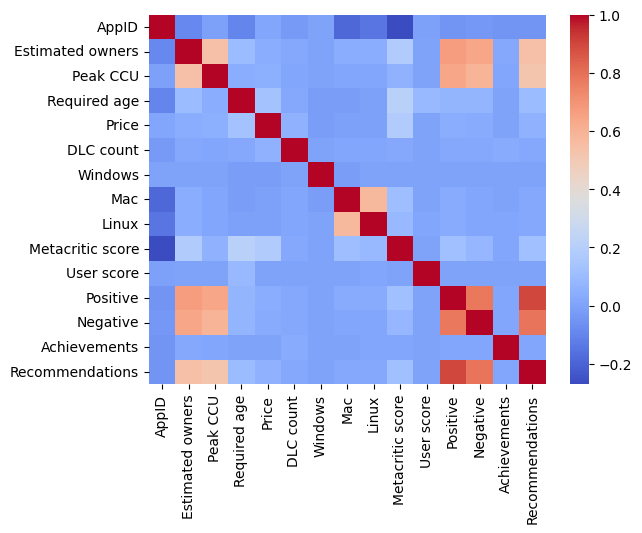

In [87]:
#initial look at heatmap
sns.heatmap(games.corr().round(2), cmap='coolwarm')

In [88]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62321 entries, 0 to 83556
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppID             62321 non-null  int64  
 1   Name              62321 non-null  object 
 2   Release date      62321 non-null  object 
 3   Estimated owners  62321 non-null  int64  
 4   Peak CCU          62321 non-null  int64  
 5   Required age      62321 non-null  int64  
 6   Price             62321 non-null  float64
 7   DLC count         62321 non-null  int64  
 8   Windows           62321 non-null  bool   
 9   Mac               62321 non-null  bool   
 10  Linux             62321 non-null  bool   
 11  Metacritic score  62321 non-null  int64  
 12  User score        62321 non-null  int64  
 13  Positive          62321 non-null  int64  
 14  Negative          62321 non-null  int64  
 15  Achievements      62321 non-null  int64  
 16  Recommendations   62321 non-null  int64 

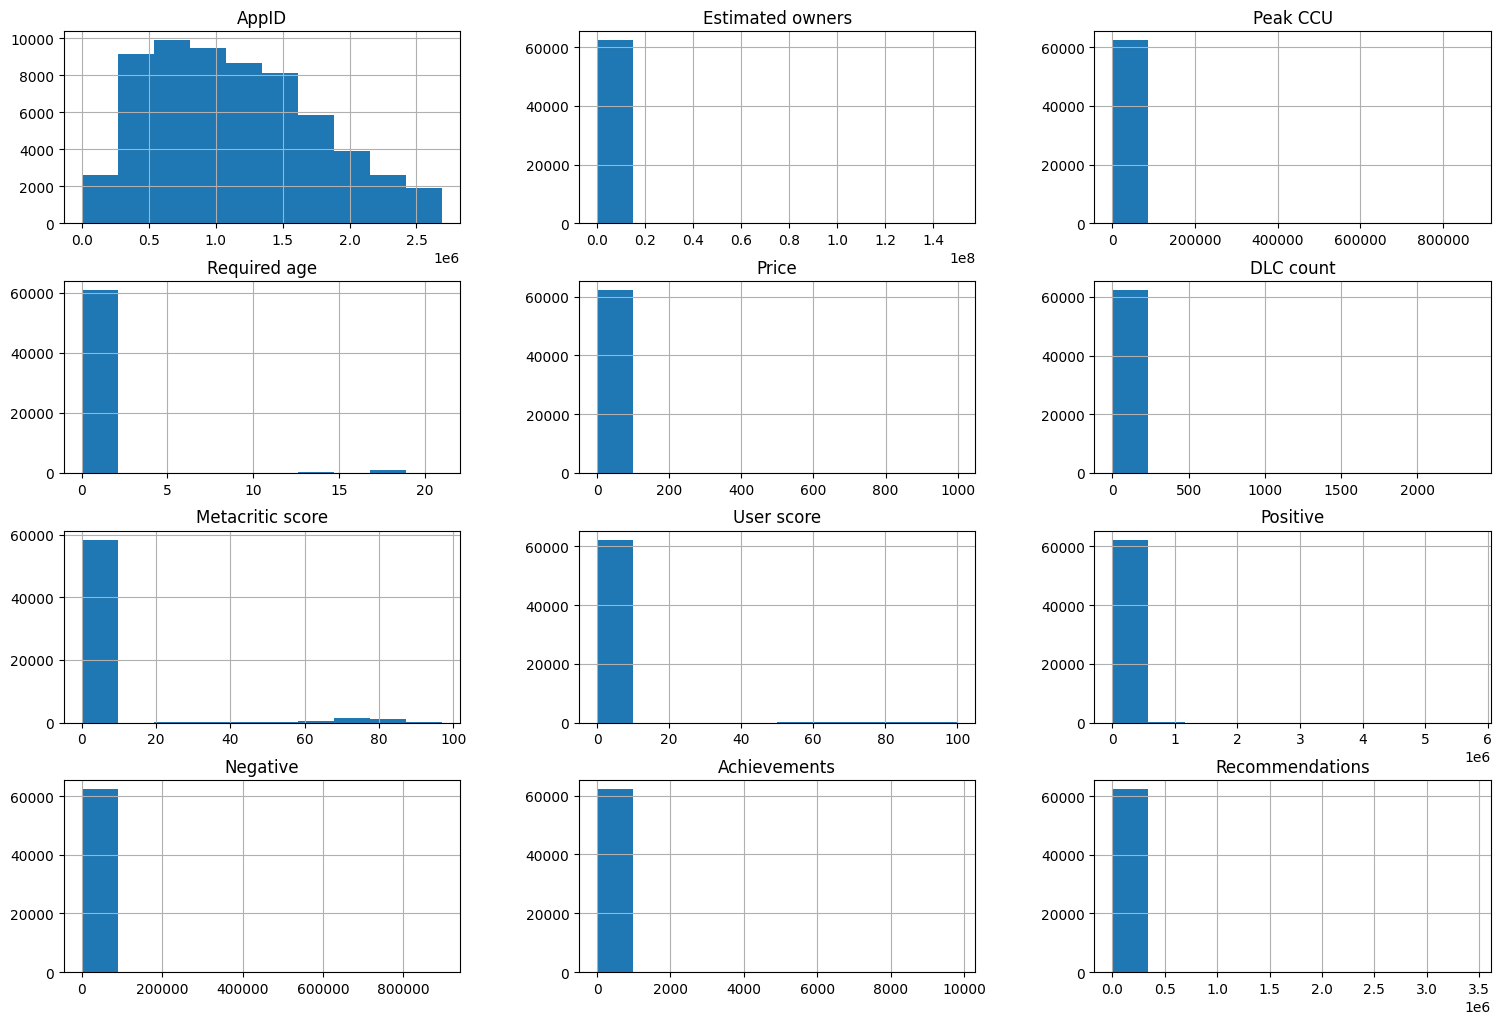

In [93]:
#histogram of numerical values
#define format for subplots (4 row and 4 columns)
fig, axis = plt.subplots(4, 3, figsize=(15, 10))
fig.tight_layout()

#create histogram for each column in DataFrame

games.hist(ax=axis);


## Removing non game by Genre

In [94]:
#code to remove check out genre
genre_count = {}
#check for nullss
for genre in games['Genres']:
  if isinstance(genre, str):
    genres = genre.split(",")
    for genre in genres:
      genre_count[genre] =genre_count.get(genre, 0) + 1

In [95]:
genre_count

{'Casual': 25019,
 'Indie': 45042,
 'Sports': 2990,
 'Action': 27110,
 'Adventure': 24816,
 'Free to Play': 3473,
 'Massively Multiplayer': 1575,
 'RPG': 11142,
 'Strategy': 12483,
 'Simulation': 12441,
 'Early Access': 7611,
 'Racing': 2437,
 'Sexual Content': 105,
 'Nudity': 116,
 'Violent': 512,
 'Gore': 304,
 'Animation & Modeling': 125,
 'Design & Illustration': 146,
 'Utilities': 247,
 'Game Development': 62,
 'Web Publishing': 38,
 'Audio Production': 60,
 'Video Production': 68,
 'Education': 97,
 'Software Training': 52,
 'Accounting': 7,
 'Photo Editing': 29,
 'Movie': 2,
 'Documentary': 1,
 'Episodic': 1,
 'Short': 1,
 'Tutorial': 1,
 '360 Video': 1}

Looking at Genre I'm going to remove everything that doesn't specifically describe a genre.
removing the following:

* 'Sexual Content': 105,
* 'Nudity': 116,
* 'Violent': 512,
* 'Gore': 304,
* 'Animation & Modeling': 125,
* 'Design & Illustration': 146,
* 'Utilities': 247,
* 'Game Development': 62,
* 'Web Publishing': 38,
* 'Audio Production': 60,
* 'Video Production': 68,
* 'Education': 97,
* 'Software Training': 52,
* 'Accounting': 7,
* 'Photo Editing': 29,
* 'Movie': 2,
* 'Documentary': 1,
* 'Episodic': 1,
* 'Short': 1,
* 'Tutorial': 1,
* '360 Video': 1}

In [96]:
values_to_remove = ['Sexual Content', 'Nudity','Violent','Gore', 'Animation & Modeling','Design & Illustration' , 'Utilities', 'Game Development', 'Web Publishing', 'Audio Production', 'Video Production', 'Education', 'Software Training', 'Accounting', 'Photo Editing', 'Movie', 'Documentary', 'Episodic', 'Short', 'Tutorial', '360 Video']

In [97]:
#create a col call remove and mark that as true if its in the value to remove
games['Remove'] = games['Genres'].apply(lambda x: any([k in x for k in values_to_remove]))

In [98]:
games['Remove'].value_counts()

False    61286
True      1035
Name: Remove, dtype: int64

In [99]:
#code to remove base on true or false and moving to a new df
games = games[games['Remove'] == False]

In [100]:
games['Remove'].value_counts()

False    61286
Name: Remove, dtype: int64

In [101]:
#code to remove check out genre **need to run again
genre_count = {}
#check for nullss
for genre in games['Genres']:
  if isinstance(genre, str):
    genres = genre.split(",")
    for genre in genres:
      genre_count[genre] =genre_count.get(genre, 0) + 1

In [102]:
columns_to_add = list(genre_count.keys())

In [103]:
columns_to_add

['Casual',
 'Indie',
 'Sports',
 'Action',
 'Adventure',
 'Free to Play',
 'Massively Multiplayer',
 'RPG',
 'Strategy',
 'Simulation',
 'Early Access',
 'Racing']

## Function for Adding Columns

In [104]:
def add_columns(dataframe, column_names):
      for col_name in column_names:
        dataframe[col_name] = 0
      return dataframe

In [105]:
#add these col to the datafram for analysis

add_columns(games, columns_to_add)

C:\Users\sophak.lim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Sports,Action,Adventure,Free to Play,Massively Multiplayer,RPG,Strategy,Simulation,Early Access,Racing
0,20200,Galactic Bowling,"Oct 21, 2008",10000,0,0,19.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0
1,655370,Train Bandit,"Oct 12, 2017",10000,0,0,0.99,0,True,True,...,0,0,0,0,0,0,0,0,0,0
3,1355720,Henosis™,"Jul 23, 2020",10000,0,0,5.99,0,True,True,...,0,0,0,0,0,0,0,0,0,0
4,1139950,Two Weeks in Painland,"Feb 3, 2020",10000,0,0,0.00,0,True,True,...,0,0,0,0,0,0,0,0,0,0
5,1469160,Wartune Reborn,"Feb 26, 2021",75000,68,0,0.00,0,True,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83548,2511290,Two Cubes,"Aug 14, 2023",10000,0,0,0.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0
83551,2424000,Wisp Child,"Oct 20, 2023",10000,0,0,14.99,0,True,True,...,0,0,0,0,0,0,0,0,0,0
83552,2237270,FireKrackers,"Sep 17, 2023",10000,0,0,4.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0
83554,2650840,nekowater,"Nov 21, 2023",10000,0,0,2.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0


##  Function to check for a value and add one to a specific column
### create a look for each of its tags and genre only

In [106]:
#Map out values for genres, categories and tags --> this one is ***Genre***, need one for tags, and categories.

val_to_check = [columns_to_add[0]]

def magic_genre(df):
    for index, i in enumerate(columns_to_add):
        #print(index)-
        val_to_check = [columns_to_add[index]]
        df[i] = df['Genres'].apply(lambda x: any([k in x for k in val_to_check])) #need to look at each category one at a time.
    return df


In [107]:
a = magic_genre(games)

C:\Users\sophak.lim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [108]:
a.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Sports,Action,Adventure,Free to Play,Massively Multiplayer,RPG,Strategy,Simulation,Early Access,Racing
0,20200,Galactic Bowling,"Oct 21, 2008",10000,0,0,19.99,0,True,False,...,True,False,False,False,False,False,False,False,False,False
1,655370,Train Bandit,"Oct 12, 2017",10000,0,0,0.99,0,True,True,...,False,True,False,False,False,False,False,False,False,False
3,1355720,Henosis™,"Jul 23, 2020",10000,0,0,5.99,0,True,True,...,False,False,True,False,False,False,False,False,False,False
4,1139950,Two Weeks in Painland,"Feb 3, 2020",10000,0,0,0.00,0,True,True,...,False,False,True,False,False,False,False,False,False,False
5,1469160,Wartune Reborn,"Feb 26, 2021",75000,68,0,0.00,0,True,False,...,False,False,True,True,True,True,True,False,False,False


In [109]:
test = a[['Estimated owners','Price','Casual','Indie','Sports','Action','Adventure','Free to Play','Massively Multiplayer','RPG','Strategy','Simulation','Early Access','Racing']]

<AxesSubplot:>

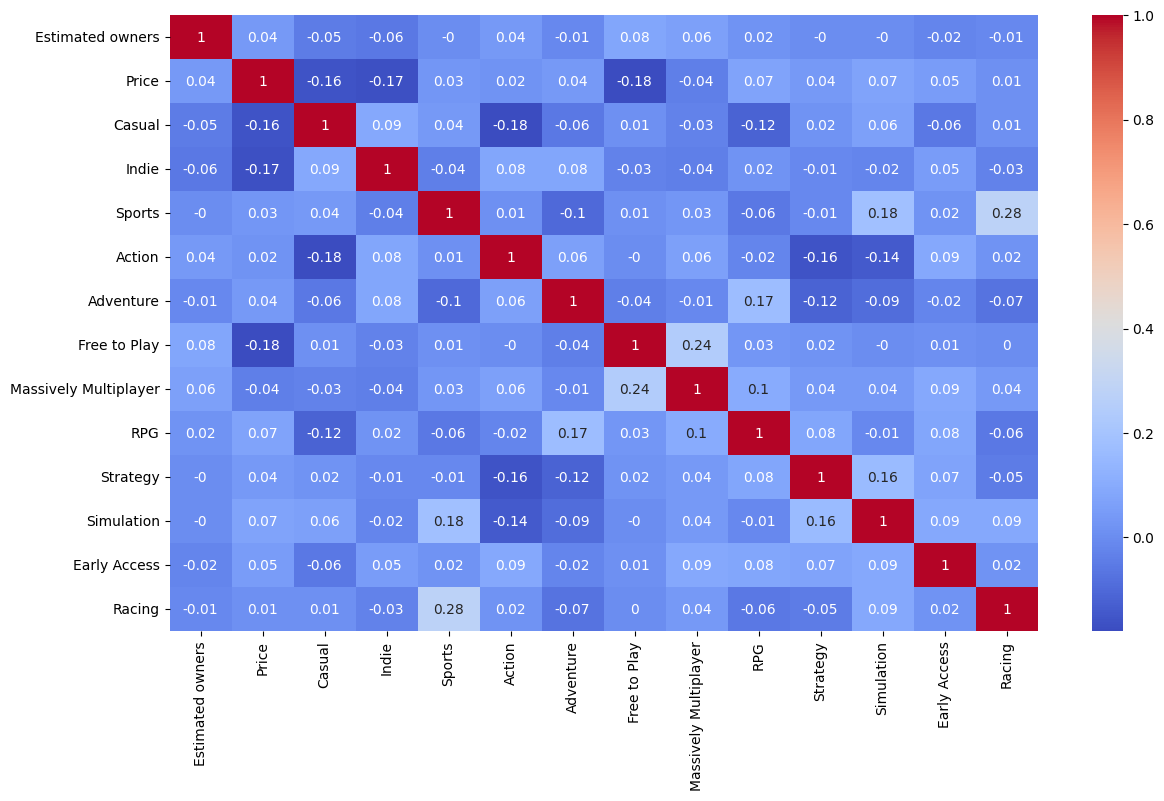

In [110]:
#initial look at heatmap
plt.figure(figsize=(14,8))
sns.heatmap(test.corr(method = 'pearson').round(2), cmap='coolwarm', annot=True)

<AxesSubplot:>

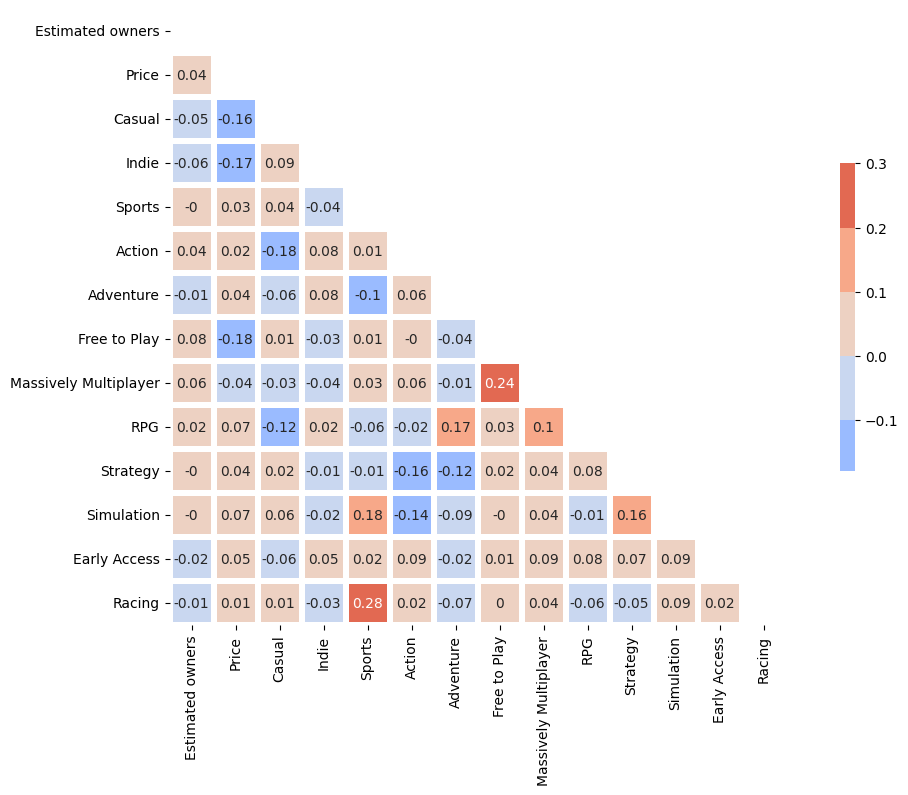

In [111]:
# sns.set_theme(style="white")
corr = test.corr().round(2)
mask = np.triu(test.corr())
f, ax = plt.subplots(figsize=(14, 8))
cmap = sns.color_palette("coolwarm")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5},
            annot = True
           )

In [112]:
test['Indie'].value_counts()

True     44496
False    16790
Name: Indie, dtype: int64

<AxesSubplot:>

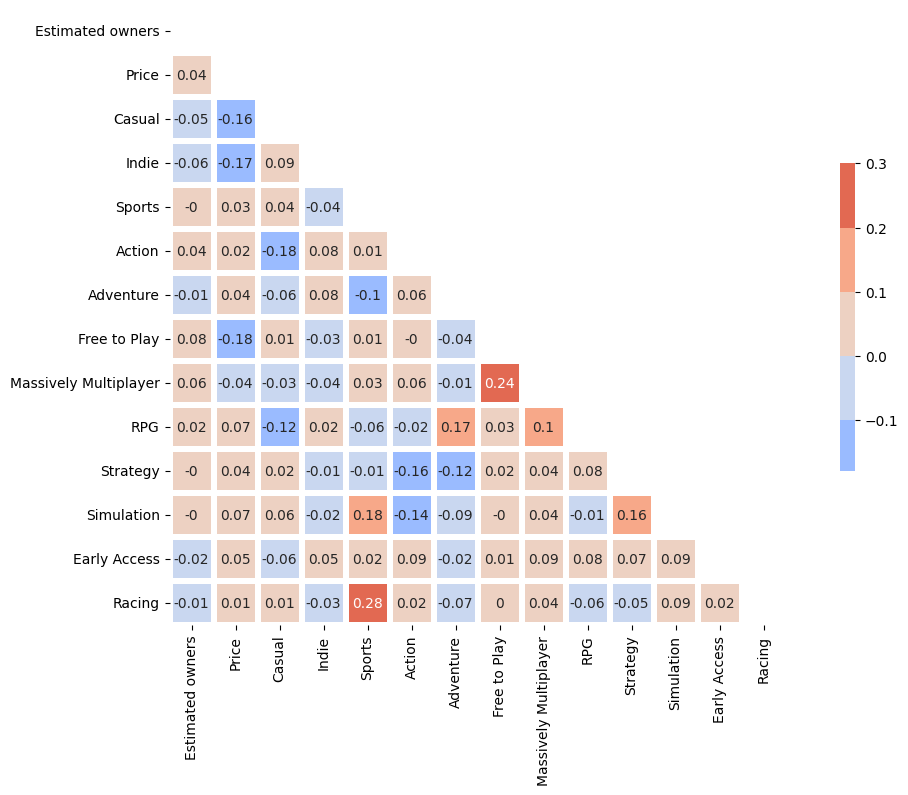

In [120]:
#is there a difference if i change it to integers?
# sns.set_theme(style="white")
corr = test.corr().round(2)
mask = np.triu(test.corr())
f, ax = plt.subplots(figsize=(14, 8))
cmap = sns.color_palette("coolwarm")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5},
            annot = True
           )

<AxesSubplot:>

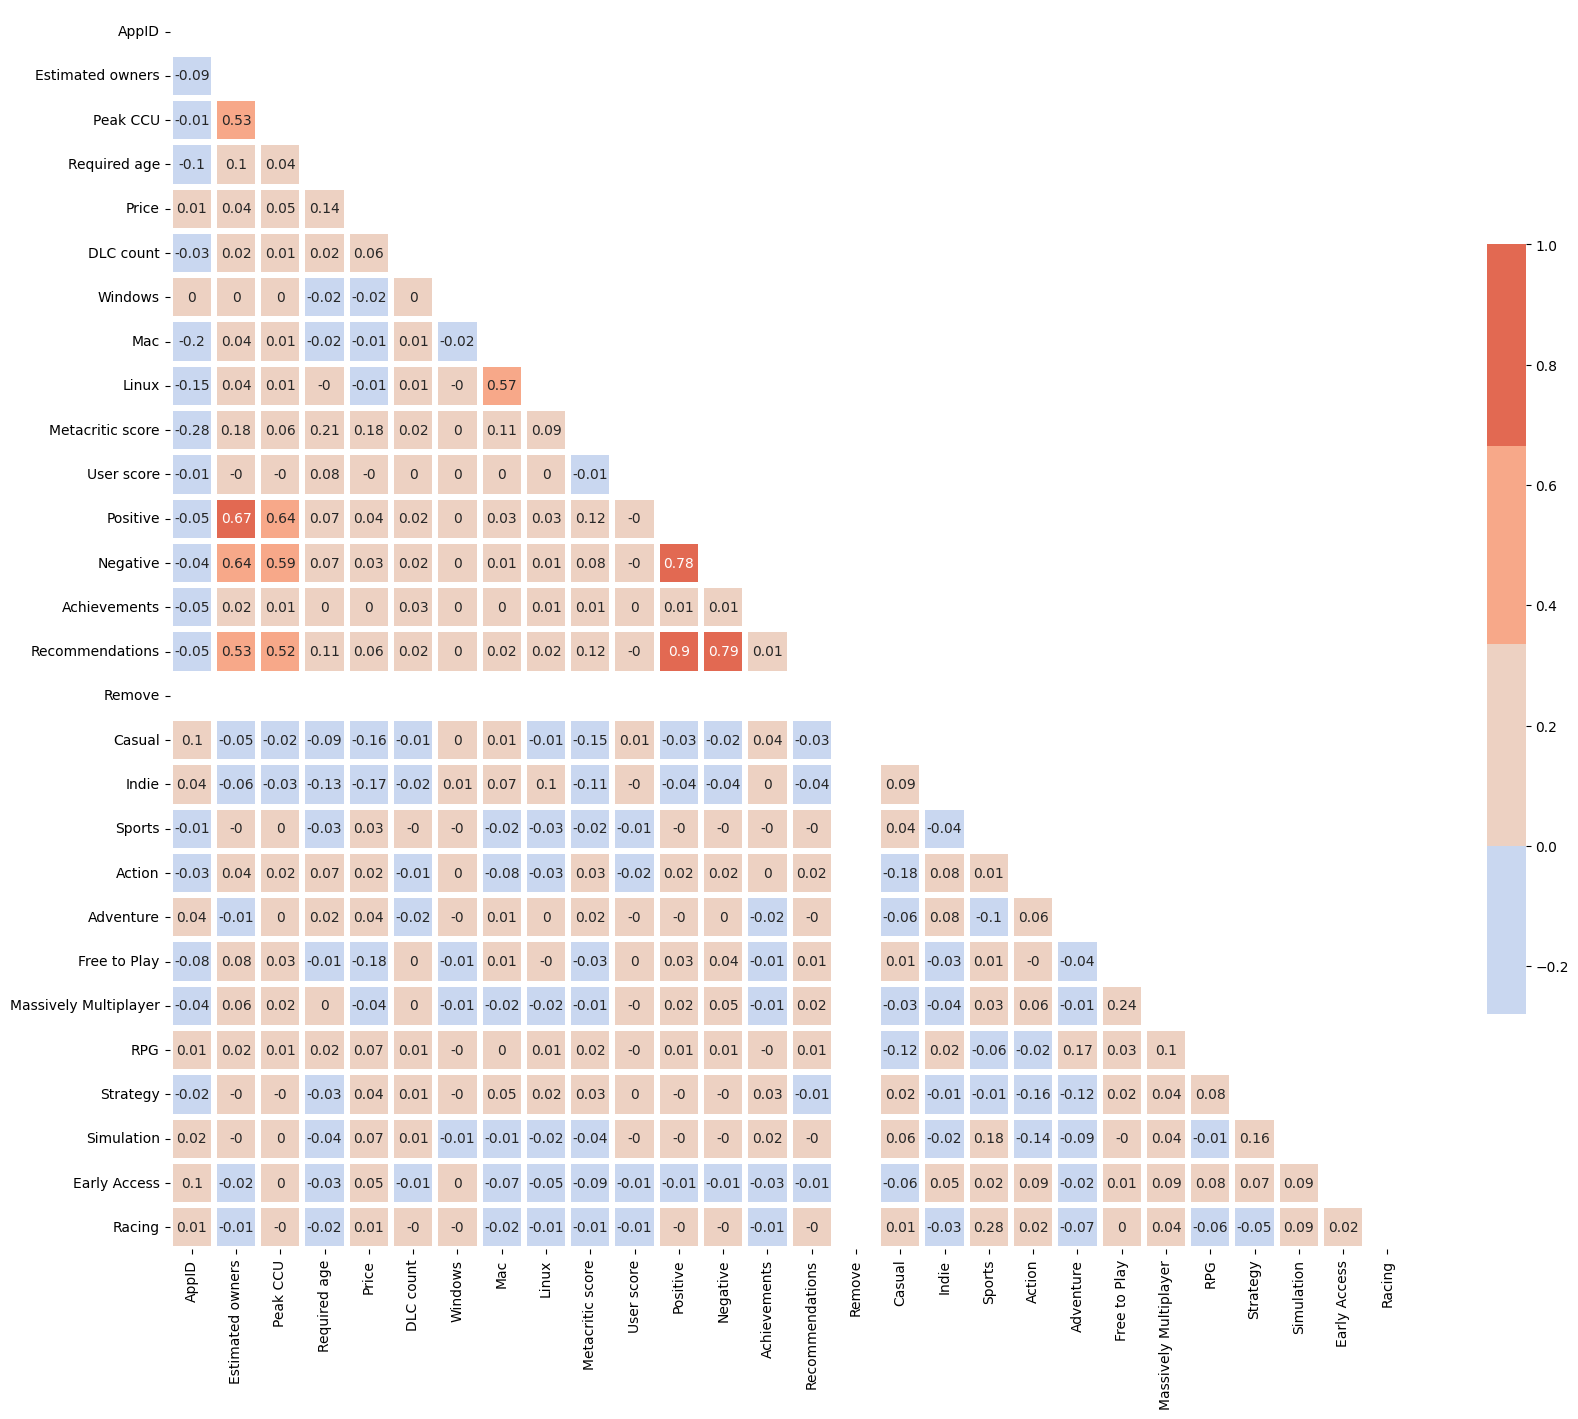

In [125]:
#is there a difference if i change it to integers?
# sns.set_theme(style="white")
corr = a.corr().round(2)
mask = np.triu(a.corr())
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.color_palette("coolwarm")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=1.0, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5},
            annot = True
           )

## Function to help sort the dictionarys


In [130]:
#sorting dictionary
def sort_dict(dictionary):

    #sort diction asceding
    sorted_dict = sorted(dictionary.items(), key=lambda x:x[1])
    converted_dict = dict(sorted_dict)

    count_dict = Counter(dict(sorted_dict))
    updated_dict = dict(count_dict.most_common(50)) #changed to 50 to sort one thing
    return count_dict

## Tag Reviews

In [127]:
#looking at tags now.
tag_count = {}

#breakdown of Genres for games_test_clean_genre


for genre in games['Tags']:
      genres = genre.split(",")
      for genre in genres:
        tag_count[genre] = tag_count.get(genre, 0) + 1

In [129]:
tag_count

{'Indie': 39109,
 'Casual': 26830,
 'Sports': 3174,
 'Bowling': 37,
 'Action': 27943,
 'Pixel Graphics': 9008,
 '2D': 17185,
 'Retro': 6299,
 'Arcade': 7609,
 'Score Attack': 1853,
 'Minimalist': 3691,
 'Comedy': 4082,
 'Singleplayer': 32468,
 'Fast-Paced': 1614,
 'Funny': 6602,
 'Parody': 429,
 'Difficult': 5171,
 'Gore': 3151,
 'Violent': 3532,
 'Western': 254,
 'Controller': 4079,
 'Blood': 412,
 '2D Platformer': 3868,
 'Atmospheric': 10967,
 'Surreal': 1711,
 'Mystery': 3685,
 'Puzzle': 11223,
 'Survival': 4624,
 'Adventure': 26197,
 'Linear': 3395,
 'Experimental': 1095,
 'Platformer': 6271,
 'Precision Platformer': 1365,
 'Puzzle-Platformer': 2760,
 'Stylized': 4138,
 'Physics': 3683,
 'Time Manipulation': 408,
 'Nudity': 2492,
 'Sexual Content': 2575,
 'Story Rich': 8842,
 'Turn-Based Combat': 2136,
 'Massively Multiplayer': 1592,
 'Multiplayer': 7704,
 'RPG': 11701,
 'Tactical RPG': 920,
 'Exploration': 7740,
 'PvP': 3266,
 'MMORPG': 412,
 'Turn-Based Strategy': 2366,
 'God Gam

In [133]:
#Top 10 tags
top10_tags = sort_dict(tag_count)
top10_tags.most_common(10)

[('Indie', 39109),
 ('Singleplayer', 32468),
 ('Action', 27943),
 ('Casual', 26830),
 ('Adventure', 26197),
 ('2D', 17185),
 ('Strategy', 13364),
 ('Simulation', 13035),
 ('RPG', 11701),
 ('Puzzle', 11223)]

## Categories Review

In [136]:
cat_count = {}

#breakdown of Genres for games_test3

for genre in games['Categories']:
      genres = genre.split(",")
      for genre in genres:
        cat_count[genre] = cat_count.get(genre, 0) + 1

In [137]:
cat_count

{'Single-player': 58728,
 'Multi-player': 12560,
 'Steam Achievements': 30780,
 'Partial Controller Support': 8628,
 'Full controller support': 13630,
 'Steam Leaderboards': 5912,
 'Remote Play on Phone': 757,
 'Remote Play on Tablet': 913,
 'Remote Play on TV': 2056,
 'MMO': 840,
 'PvP': 7686,
 'Online PvP': 5443,
 'Co-op': 6326,
 'Online Co-op': 3437,
 'In-App Purchases': 1397,
 'Steam Cloud': 16295,
 'Steam Trading Cards': 9466,
 'Shared/Split Screen': 4792,
 'Cross-Platform Multiplayer': 1879,
 'Remote Play Together': 5301,
 'Stats': 3139,
 'Shared/Split Screen PvP': 3409,
 'Captions available': 1078,
 'Steam Workshop': 1640,
 'Includes level editor': 1700,
 'LAN PvP': 533,
 'LAN Co-op': 476,
 'Shared/Split Screen Co-op': 2754,
 'Steam Turn Notifications': 84,
 'VR Support': 230,
 'SteamVR Collectibles': 39,
 'Valve Anti-Cheat enabled': 124,
 'Includes Source SDK': 46,
 'Commentary available': 210,
 'Mods': 2,
 'Mods (require HL2)': 1,
 'Tracked Controller Support': 160,
 'VR Only'

In [138]:
#Top 10 Categories
top10_cats = sort_dict(cat_count)
top10_cats.most_common(10)

[('Single-player', 58728),
 ('Steam Achievements', 30780),
 ('Steam Cloud', 16295),
 ('Full controller support', 13630),
 ('Multi-player', 12560),
 ('Steam Trading Cards', 9466),
 ('Partial Controller Support', 8628),
 ('PvP', 7686),
 ('Co-op', 6326),
 ('Steam Leaderboards', 5912)]

In [ ]:
#mergining the two list with the most common, no overlap.
#cat_tags = list(set(top24_cat + top25_tags))

## Function to add

In [139]:
#plotting Categories with data sorting
def plot_dict_bar(dictionary):

    #sort diction asceding
    sorted_dict = sorted(dictionary.items(), key=lambda x:x[1])
    converted_dict = dict(sorted_dict)

    count_dict = Counter(dict(sorted_dict))
    updated_dict = dict(count_dict.most_common(20))
    #
    keys = updated_dict.keys()
    values = updated_dict.values()

    plt.bar(keys, values)
    plt.xlabel('Keys', labelpad=10)
    plt.ylabel('Values')
    #adjust some layouts
    plt.xticks(rotation = 45, ha= 'right') #angles the columns labels for better readability
    plt.figure(figsize=(20,6))

    plt.show()

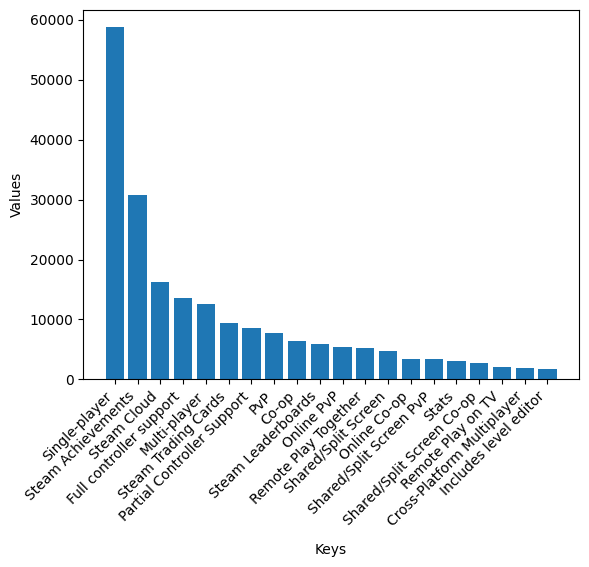

<Figure size 2000x600 with 0 Axes>

In [140]:
plot_dict_bar(top10_cats)